In [1]:
import cv2
import numpy as np
from skimage.feature import match_template
import matplotlib.pyplot as plt

In [6]:
# Charger l'image de la route
route_image = cv2.imread('/route1.png', cv2.IMREAD_GRAYSCALE)

# Charger l'image du panneau "Piste cyclable obligatoire"
panneau_image = cv2.imread('/panneau.png', cv2.IMREAD_GRAYSCALE)

In [7]:
# Initialiser le détecteur SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et les descripteurs
keypoints_route, descriptors_route = sift.detectAndCompute(route_image, None)
keypoints_panneau, descriptors_panneau = sift.detectAndCompute(panneau_image, None)

In [8]:
# Initialiser le matcher BFMatcher
bf = cv2.BFMatcher()

# Faire correspondre les descripteurs
matches = bf.knnMatch(descriptors_panneau, descriptors_route, k=2)

# Appliquer le ratio test pour filtrer les bonnes correspondances
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

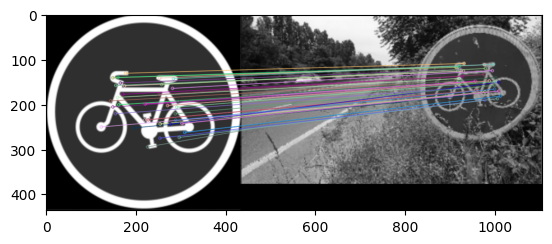

In [9]:
# Dessiner les correspondances
result_image = cv2.drawMatches(panneau_image, keypoints_panneau, route_image, keypoints_route, good_matches, None, flags=2)

# Afficher l'image résultante
plt.imshow(result_image)
plt.show()

In [10]:
# Charger l'image de la route
route_image = cv2.imread('/route2.jpg', cv2.IMREAD_GRAYSCALE)

# Charger l'image du panneau "Piste cyclable obligatoire" (template)
panneau_template = cv2.imread('/panneau.png', cv2.IMREAD_GRAYSCALE)

In [11]:
# Appliquer la correspondance de template
result = match_template(route_image, panneau_template)

# Trouver les coordonnées du meilleur match
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

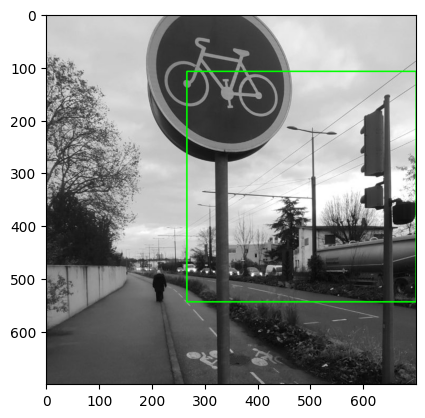

In [12]:
# Obtenir les dimensions du template
h, w = panneau_template.shape

# Dessiner un rectangle autour du panneau détecté
route_image_color = cv2.cvtColor(route_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(route_image_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher l'image avec le rectangle
plt.imshow(route_image_color)
plt.show()